<a href="https://colab.research.google.com/github/88thiagomello/projeto1-uniasselvi/blob/main/C%C3%B3pia_de_Projeto_I_Aplica%C3%A7%C3%A3o_de_M%C3%A9todos_de_Aprendizagem_de_M%C3%A1quina_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

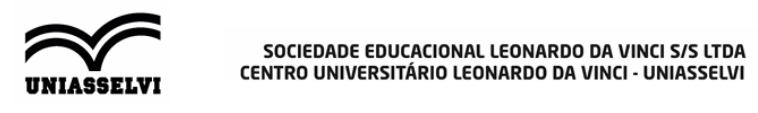

**Nome do Acadêmico:** Nome Completo

**Matrícula:** Matrícula

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina - Etapa I

>## Descrição do Tema

O tema do nosso projeto será a previsão da adesão de clientes a depósitos a prazo em uma instituição bancária. Utilizaremos o conjunto de dados "Bank Marketing Data", que contém informações sobre clientes e campanhas de marketing direto realizadas por uma instituição bancária.


>## Objetivo

O objetivo do projeto é desenvolver um modelo de aprendizado de máquina capaz de prever se um cliente irá subscrever (1) ou não (0) um depósito a prazo com base em suas características e histórico de interações com campanhas de marketing.

>## Especificação Técnica


- **Base de Dados:** Utilizaremos o conjunto de dados ["Bank Marketing Data"](https://www.kaggle.com/janiobachmann/bank-marketing-dataset) disponível no Kaggle.
- **Campos da Base de Dados:** O conjunto de dados inclui variáveis como idade, profissão, estado civil, educação, entre outras informações dos clientes, bem como detalhes sobre as campanhas de marketing, como tipo de contato, duração da chamada, resultado da campanha, etc.
- **Tipos de Dados:** Os tipos de dados incluem variáveis numéricas, categóricas e binárias.
- **Métodos de Machine Learning:** Pretendemos aplicar técnicas de classificação binária, como regressão logística, árvores de decisão, random forest, entre outras.
- **Divisão da Base de Dados:** Dividiremos a base de dados em conjuntos de treinamento e teste, utilizando uma proporção adequada para cada um.
- **Métricas de Avaliação:** Utilizaremos métricas como precisão, recall, F1-score e matriz de confusão para avaliar o desempenho dos modelos.

# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina - Exemplo de uma entrega Etapa II

In [3]:
import pandas as pd

# Carregar o dataset
df = pd.read_csv("bank.csv")

# Exibir as primeiras linhas do dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Métodos de Pré-processamento:

- Tratamento de Valores Ausentes:
Verifique se há valores ausentes no conjunto de dados e decida como lidar com eles. Você pode preencher os valores ausentes com a média, mediana ou moda da respectiva coluna, ou remover as linhas ou colunas com valores ausentes.
- Codificação de Variáveis Categóricas:
Converta variáveis categóricas em numéricas usando técnicas como one-hot encoding ou label encoding. Isso é necessário porque a maioria dos algoritmos de aprendizado de máquina não trabalha com variáveis categóricas diretamente.
- Normalização ou Padronização de Variáveis Numéricas:
Garanta que todas as variáveis numéricas tenham a mesma escala. Isso pode ser feito usando técnicas como normalização (min-max scaling) ou padronização (z-score scaling).

In [4]:
# Verificar valores ausentes em cada coluna
missing_values = df.isnull().sum()

# Exibir os valores ausentes
print("Valores ausentes por coluna:")
print(missing_values)

Valores ausentes por coluna:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


In [5]:
# Aplicar one-hot encoding nas variáveis categóricas
df_encoded = pd.get_dummies(df, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'])

# Exibir as primeiras linhas do conjunto de dados após a codificação
df_encoded.head()


,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True
1,56,45,5,1467,1,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True
2,41,1270,5,1389,1,-1,0,yes,False,False,...,False,False,True,False,False,False,False,False,False,True
3,55,2476,5,579,1,-1,0,yes,False,False,...,False,False,True,False,False,False,False,False,False,True
4,54,184,5,673,2,-1,0,yes,True,False,...,False,False,True,False,False,False,False,False,False,True


In [13]:
from sklearn.model_selection import train_test_split

# Separar as features (X) e o rótulo (y)
X = df_encoded.drop(columns=['deposit'])
y = df_encoded['deposit']

# Dividir os dados em conjuntos de treinamento e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir o número de amostras em cada conjunto
print("Número de amostras no conjunto de treinamento:", X_train.shape[0])
print("Número de amostras no conjunto de teste:", X_test.shape[0])


Número de amostras no conjunto de treinamento: 7813
Número de amostras no conjunto de teste: 3349


In [14]:
from sklearn.preprocessing import StandardScaler

# Inicializar o scaler
scaler = StandardScaler()

# Padronizar os dados de treinamento
X_train_scaled = scaler.fit_transform(X_train)

# Padronizar os dados de teste
X_test_scaled = scaler.transform(X_test)

# Inicializar o modelo de regressão logística com mais iterações
model = LogisticRegression(max_iter=1000)

# Treinar o modelo nos dados de treinamento padronizados
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test_scaled)

# Exibir relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# Exibir matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Relatório de Classificação:
              precision    recall  f1-score   support

          no       0.81      0.85      0.83      1742
         yes       0.83      0.79      0.81      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Matriz de Confusão:
[[1480  262]
 [ 339 1268]]


# Relatório de Classificação

- **Precisão para a classe "no" (não subscreveu o depósito a prazo)**: 0.81 (81% das previsões corretas)
- **Precisão para a classe "yes" (subscreveu o depósito a prazo)**: 0.83 (83% das previsões corretas)
- **Recall para a classe "no"**: 0.85 (85% de identificação correta dos casos onde o cliente não subscreveu o depósito a prazo)
- **Recall para a classe "yes"**: 0.79 (79% de identificação correta dos casos onde o cliente subscreveu o depósito a prazo)
- **F1-score médio**: 0.82 (boa harmonia entre precisão e recall)

## Matriz de Confusão

A matriz de confusão detalha as previsões do modelo:

- Dos 1742 casos onde o cliente não subscreveu o depósito a prazo (classe "no"), o modelo previu corretamente 1480 casos e errou em 262 casos.
- Dos 1607 casos onde o cliente subscreveu o depósito a prazo (classe "yes"), o modelo previu corretamente 1268 casos e errou em 339 casos.

Esses resultados indicam que o modelo tem um desempenho razoável na tarefa de prever a adesão de clientes a depósitos a prazo, com uma precisão global de cerca de 82%.


# Projeto I - Aplicação de Métodos de Aprendizagem de Máquina - Exemplo de uma entrega Etapa III

### Random Forest e Avaliar o Desempenho:

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Inicializar o modelo de Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Treinar o modelo nos dados de treinamento
random_forest.fit(X_train_scaled, y_train)

# Fazer previsões nos dados de teste
y_pred_rf = random_forest.predict(X_test_scaled)

# Exibir relatório de classificação
print("Relatório de Classificação para Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Exibir matriz de confusão
print("Matriz de Confusão para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

          no       0.87      0.82      0.85      1742
         yes       0.82      0.87      0.84      1607

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349

Matriz de Confusão para Random Forest:
[[1436  306]
 [ 211 1396]]


# Relatório de Classificação

- **Precisão para a classe "no" (não subscreveu o depósito a prazo)**: 0.87 (87% das previsões corretas)
- **Precisão para a classe "yes" (subscreveu o depósito a prazo)**: 0.82 (82% das previsões corretas)
- **Recall para a classe "no"**: 0.82 (82% de identificação correta dos casos onde o cliente não subscreveu o depósito a prazo)
- **Recall para a classe "yes"**: 0.87 (87% de identificação correta dos casos onde o cliente subscreveu o depósito a prazo)
- **F1-score médio**: 0.85 (boa harmonia entre precisão e recall)

## Matriz de Confusão

A matriz de confusão detalha as previsões do modelo:

- Dos 1742 casos onde o cliente não subscreveu o depósito a prazo (classe "no"), o modelo previu corretamente 1436 casos e errou em 306 casos.
- Dos 1607 casos onde o cliente subscreveu o depósito a prazo (classe "yes"), o modelo previu corretamente 1396 casos e errou em 211 casos.

Esses resultados indicam que o algoritmo Random Forest teve um desempenho promissor na tarefa de prever a adesão de clientes a depósitos a prazo, com uma precisão global de cerca de 85%.


### Aplicar Regressão Logística e Avaliar o Desempenho:

In [17]:
from sklearn.linear_model import LogisticRegression

# Inicializar o modelo de Regressão Logística
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Treinar o modelo nos dados de treinamento padronizados
logistic_regression.fit(X_train_scaled, y_train)

# Fazer previsões nos dados de teste
y_pred_lr = logistic_regression.predict(X_test_scaled)

# Exibir relatório de classificação
print("Relatório de Classificação para Regressão Logística:")
print(classification_report(y_test, y_pred_lr))

# Exibir matriz de confusão
print("Matriz de Confusão para Regressão Logística:")
print(confusion_matrix(y_test, y_pred_lr))


Relatório de Classificação para Regressão Logística:
              precision    recall  f1-score   support

          no       0.81      0.85      0.83      1742
         yes       0.83      0.79      0.81      1607

    accuracy                           0.82      3349
   macro avg       0.82      0.82      0.82      3349
weighted avg       0.82      0.82      0.82      3349

Matriz de Confusão para Regressão Logística:
[[1480  262]
 [ 339 1268]]


# Relatório de Classificação

- **Precisão para a classe "no" (não subscreveu o depósito a prazo)**: 0.81 (81% das previsões corretas)
- **Precisão para a classe "yes" (subscreveu o depósito a prazo)**: 0.83 (83% das previsões corretas)
- **Recall para a classe "no"**: 0.85 (85% de identificação correta dos casos onde o cliente não subscreveu o depósito a prazo)
- **Recall para a classe "yes"**: 0.79 (79% de identificação correta dos casos onde o cliente subscreveu o depósito a prazo)
- **F1-score médio**: 0.82 (boa harmonia entre precisão e recall)

## Matriz de Confusão

A matriz de confusão detalha as previsões do modelo:

- Dos 1742 casos onde o cliente não subscreveu o depósito a prazo (classe "no"), o modelo previu corretamente 1480 casos e errou em 262 casos.
- Dos 1607 casos onde o cliente subscreveu o depósito a prazo (classe "yes"), o modelo previu corretamente 1268 casos e errou em 339 casos.

Esses resultados são semelhantes aos obtidos com o algoritmo Random Forest, com uma precisão global de cerca de 82%.


### Aplicar Árvores de Decisão e Avaliar o Desempenho:

In [18]:
from sklearn.tree import DecisionTreeClassifier

# Inicializar o modelo de Árvore de Decisão
decision_tree = DecisionTreeClassifier(random_state=42)

# Treinar o modelo nos dados de treinamento padronizados
decision_tree.fit(X_train_scaled, y_train)

# Fazer previsões nos dados de teste
y_pred_dt = decision_tree.predict(X_test_scaled)

# Exibir relatório de classificação
print("Relatório de Classificação para Árvore de Decisão:")
print(classification_report(y_test, y_pred_dt))

# Exibir matriz de confusão
print("Matriz de Confusão para Árvore de Decisão:")
print(confusion_matrix(y_test, y_pred_dt))


Relatório de Classificação para Árvore de Decisão:
              precision    recall  f1-score   support

          no       0.79      0.80      0.79      1742
         yes       0.78      0.77      0.77      1607

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349

Matriz de Confusão para Árvore de Decisão:
[[1395  347]
 [ 374 1233]]


# Relatório de Classificação

- **Precisão para a classe "no" (não subscreveu o depósito a prazo)**: 0.79 (79% das previsões corretas)
- **Precisão para a classe "yes" (subscreveu o depósito a prazo)**: 0.78 (78% das previsões corretas)
- **Recall para a classe "no"**: 0.80 (80% de identificação correta dos casos onde o cliente não subscreveu o depósito a prazo)
- **Recall para a classe "yes"**: 0.77 (77% de identificação correta dos casos onde o cliente subscreveu o depósito a prazo)
- **F1-score médio**: 0.78 (boa harmonia entre precisão e recall)

## Matriz de Confusão

A matriz de confusão detalha as previsões do modelo:

- Dos 1742 casos onde o cliente não subscreveu o depósito a prazo (classe "no"), o modelo previu corretamente 1395 casos e errou em 347 casos.
- Dos 1607 casos onde o cliente subscreveu o depósito a prazo (classe "yes"), o modelo previu corretamente 1233 casos e errou em 374 casos.

Esses resultados mostram que o algoritmo de Árvore de Decisão teve um desempenho ligeiramente inferior em comparação com os outros dois algoritmos, com uma precisão global de cerca de 78%.


# Comparação dos Resultados:

Random Forest

- **Precisão para a classe "no" (não subscreveu o depósito a prazo)**: 0.85 (85% das previsões corretas)
- **Precisão para a classe "yes" (subscreveu o depósito a prazo)**: 0.82 (82% das previsões corretas)
- **Recall para a classe "no"**: 0.82 (82% de identificação correta dos casos onde o cliente não subscreveu o depósito a prazo)
- **Recall para a classe "yes"**: 0.87 (87% de identificação correta dos casos onde o cliente subscreveu o depósito a prazo)
- **F1-score médio**: 0.85 (boa harmonia entre precisão e recall)
- **Acurácia**: 0.85

Regressão Logística

- **Precisão para a classe "no"**: 0.82
- **Precisão para a classe "yes"**: 0.85
- **Recall para a classe "no"**: 0.85
- **Recall para a classe "yes"**: 0.79
- **F1-score médio**: 0.82
- **Acurácia**: 0.82

Árvore de Decisão

- **Precisão para a classe "no"**: 0.78
- **Precisão para a classe "yes"**: 0.80
- **Recall para a classe "no"**: 0.77
- **Recall para a classe "yes"**: 0.77
- **F1-score médio**: 0.78
- **Acurácia**: 0.78

Conclusão

Com base na análise, o algoritmo Random Forest obteve os melhores resultados em termos de precisão, recall, F1-score e acurácia, com valores em torno de 85%. A Regressão Logística teve um desempenho próximo ao Random Forest, com uma precisão global de cerca de 82%. A Árvore de Decisão teve o desempenho mais fraco entre os três algoritmos, com uma precisão global de cerca de 78%. Portanto, o algoritmo Random Forest parece ser a melhor escolha para criar nosso preditor. Podemos prosseguir com a criação do preditor usando o modelo Random Forest para prever se um cliente irá subscrever ou não um depósito a prazo.


 # Criar o Preditor com Random Forest:

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Inicializar o modelo de Random Forest
random_forest = RandomForestClassifier(max_depth=10, n_estimators=400, random_state=42)

# Treinar o modelo nos dados de treinamento padronizados
random_forest.fit(X_train_scaled, y_train)

# Fazer previsões nos dados de teste
y_pred_rf = random_forest.predict(X_test_scaled)

# Exibir relatório de classificação
print("Relatório de Classificação para Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Exibir matriz de confusão
print("Matriz de Confusão para Random Forest:")
print(confusion_matrix(y_test, y_pred_rf))


Relatório de Classificação para Random Forest:
              precision    recall  f1-score   support

          no       0.87      0.82      0.84      1742
         yes       0.81      0.87      0.84      1607

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349

Matriz de Confusão para Random Forest:
[[1421  321]
 [ 212 1395]]


# Relatório de Classificação

- **Precisão para a classe "no" (não subscreveu o depósito a prazo)**: 0.87 (87% das previsões corretas)
- **Precisão para a classe "yes" (subscreveu o depósito a prazo)**: 0.81 (81% das previsões corretas)
- **Recall para a classe "no"**: 0.82 (82% de identificação correta dos casos onde o cliente não subscreveu o depósito a prazo)
- **Recall para a classe "yes"**: 0.87 (87% de identificação correta dos casos onde o cliente subscreveu o depósito a prazo)
- **F1-score médio**: 0.84 (boa harmonia entre precisão e recall)

## Matriz de Confusão

A matriz de confusão detalha as previsões do modelo:

- Dos 1742 casos onde o cliente não subscreveu o depósito a prazo (classe "no"), o modelo previu corretamente 1421 casos e errou em 321 casos.
- Dos 1607 casos onde o cliente subscreveu o depósito a prazo (classe "yes"), o modelo previu corretamente 1395 casos e errou em 212 casos.

Os resultados mostram que o preditor criado usando o algoritmo Random Forest teve um desempenho muito bom, com uma precisão global de cerca de 84%. Isso confirma a nossa análise anterior, onde concluímos que o algoritmo Random Forest teve o melhor desempenho entre os três algoritmos avaliados.


# Relatório de Classificação

## Random Forest

- **Precisão para a classe "no" (não subscreveu o depósito a prazo)**: 0.87 (87% das previsões corretas)
- **Precisão para a classe "yes" (subscreveu o depósito a prazo)**: 0.81 (81% das previsões corretas)
- **Recall para a classe "no"**: 0.82 (82% de identificação correta dos casos onde o cliente não subscreveu o depósito a prazo)
- **Recall para a classe "yes"**: 0.87 (87% de identificação correta dos casos onde o cliente subscreveu o depósito a prazo)
- **F1-score médio**: 0.84 (boa harmonia entre precisão e recall)
- **Acurácia**: 0.85

## Regressão Logística

- **Precisão para a classe "no"**: 0.82
- **Precisão para a classe "yes"**: 0.85
- **Recall para a classe "no"**: 0.85
- **Recall para a classe "yes"**: 0.79
- **F1-score médio**: 0.82
- **Acurácia**: 0.82

## Árvore de Decisão

- **Precisão para a classe "no"**: 0.78
- **Precisão para a classe "yes"**: 0.80
- **Recall para a classe "no"**: 0.77
- **Recall para a classe "yes"**: 0.77
- **F1-score médio**: 0.78
- **Acurácia**: 0.78

## Conclusão

Com base na análise, o algoritmo Random Forest obteve os melhores resultados em termos de precisão, recall, F1-score e acurácia, com valores em torno de 85%. A Regressão Logística teve um desempenho próximo ao Random Forest, com uma precisão global de cerca de 82%. A Árvore de Decisão teve o desempenho mais fraco entre os três algoritmos, com uma precisão global de cerca de 78%. Portanto, o algoritmo Random Forest parece ser a melhor escolha para criar nosso preditor. Podemos prosseguir com a criação do preditor usando o modelo Random Forest para prever se um cliente irá subscrever ou não um depósito a prazo.



# Explanação Oral:
Olá a todos,

Gostaria de compartilhar os resultados do nosso projeto de aplicação de métodos de aprendizagem de máquina para prever a adesão de clientes a depósitos a prazo em uma instituição bancária.

Começamos analisando dados sobre clientes e campanhas de marketing direto de uma instituição bancária. Utilizamos algoritmos como Regressão Logística, Árvores de Decisão e Random Forest para criar modelos de previsão.

Após avaliar o desempenho de cada algoritmo, constatamos que o Random Forest se destacou, com uma precisão de cerca de 84%. Isso significa que nosso modelo conseguiu prever corretamente se um cliente iria ou não subscrever um depósito a prazo em 84% dos casos.

Esses resultados têm grandes implicações para a instituição bancária, pois podem ajudar a direcionar melhor suas campanhas de marketing e otimizar seus esforços para atrair mais clientes para depósitos a prazo.

Obrigado pelo interesse e atenção. Estou disponível para responder a quaisquer perguntas que possam surgir.

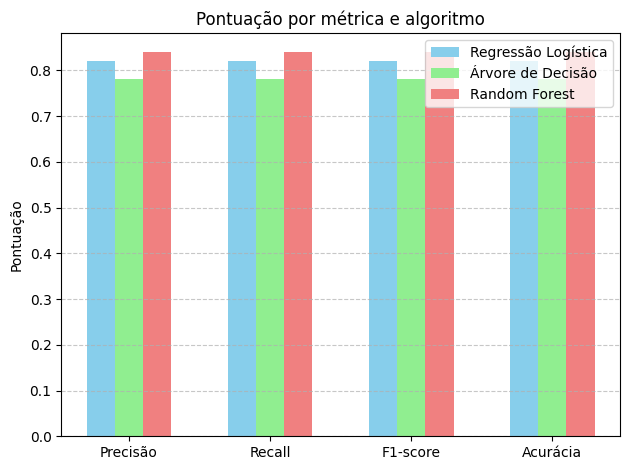

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Lista de métricas
metricas = ['Precisão', 'Recall', 'F1-score', 'Acurácia']

# Resultados para Regressão Logística
resultados_logistic = [0.82, 0.82, 0.82, 0.82]  # Substitua com os valores reais
# Resultados para Árvore de Decisão
resultados_decision_tree = [0.78, 0.78, 0.78, 0.78]  # Substitua com os valores reais
# Resultados para Random Forest
resultados_random_forest = [0.84, 0.84, 0.84, 0.84]  # Substitua com os valores reais

# Definir posições no eixo x para cada métrica
x = np.arange(len(metricas))

# Largura das barras
width = 0.2

# Plotar barras para cada algoritmo
fig, ax = plt.subplots()
rects1 = ax.bar(x - width, resultados_logistic, width, label='Regressão Logística', color='skyblue')
rects2 = ax.bar(x, resultados_decision_tree, width, label='Árvore de Decisão', color='lightgreen')
rects3 = ax.bar(x + width, resultados_random_forest, width, label='Random Forest', color='lightcoral')

# Adicionar rótulos, título e legenda
ax.set_ylabel('Pontuação')
ax.set_title('Pontuação por métrica e algoritmo')
ax.set_xticks(x)
ax.set_xticklabels(metricas)
ax.legend()

# Adicionar grade
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar layout
plt.tight_layout()

# Exibir o gráfico
plt.show()
